In [1]:
#%%
import plotly.express as px       # interactive plots
import matplotlib.pyplot as plt   # non interactive plots
import numpy as np
import pandas as pd
import textwrap                                                 # need this to make the long title

In [9]:
csvConed = "DataFiles/GasHistory_2010_ReportFrequency_Monthly.csv"
csvFDNY  = "DataFiles/FDNY/Geoid_Count2018.csv"#"DataFiles/FDNY/FDNY2018.csv"
conedMonthlyDF  = pd.read_csv(csvConed)  
fdnyMonthlyDF  = pd.read_csv(csvFDNY)  
csvHeader = ['Geoid', 'MonthYear_ConEd', 'NumberOfReports_ConEd', 
# 'MonthYear_FDNY', 'NumberOfReports_FDNY', 
'CountyName', 'CensusTract', "Month"] 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
vsDF = pd.DataFrame()
for col in range(0, len(csvHeader)):
    vsDF[csvHeader[col]] = str


MIN_NUM_TRACTS_NEEDED_TO_PRINT = 140
coned_CENSUS_TRACT_COL = "CensusTract_2010"
coned_TOTAL_REPORT     = "TotalReports"
coned_COUNTY_NAME      = "CountyName_2010"
coned_GEOID            = "GEOID_SCT"
fdny_TOTAL_REPORT      = "NumberOfReports"
fdny_GEOID             = "Geoid"

# FIXING FDNY DATA: Spliting Time col to Month and Year and then adding new col that is Month-yyyy string like my con ed data 
fdnyMonthlyDF[['Month', 'Year']] = fdnyMonthlyDF.Time.str.split("/",expand=True)                                    
fdnyMonthlyDF[['Month', 'Year']] = fdnyMonthlyDF[['Month', 'Year']].apply(pd.to_numeric)                     
fdnyMonthlyDF = fdnyMonthlyDF.sort_values(by=['Year', 'Month'], ascending=False).drop(columns=['Time'])
fdnyMonthlyDF = fdnyMonthlyDF.reset_index(drop=True)  
fdnyMonthlyDF["MonthYear"] = str
for row in range(0, len(fdnyMonthlyDF)): 
    monthYearStr = months[int(fdnyMonthlyDF.iloc[row]["Month"])-1]+"-"+str(fdnyMonthlyDF.iloc[row]["Year"])
    fdnyMonthlyDF.at[row, "MonthYear"] = monthYearStr
print("---------- FDNY Data for 2018 ----------")
fdnyMonthlyDF


---------- FDNY Data for 2018 ----------


,Geoid,NumberOfReports,Month,Year,MonthYear
0,36047089000,3,12,2018,December-2018
1,36081043701,1,12,2018,December-2018
2,36085012200,1,12,2018,December-2018
3,36005009000,9,12,2018,December-2018
4,36005014300,2,12,2018,December-2018
...,...,...,...,...,...
11460,36061010602,1,1,2018,January-2018
11461,36081058300,1,1,2018,January-2018
11462,36081099100,1,1,2018,January-2018
11463,36081093800,1,1,2018,January-2018


In [10]:
print("---------- ConEdison Data----------")
conedMonthlyDF

---------- ConEdison Data----------


,MonthYear,CensusTract_2010,TotalReports,CensusTract_2010_ID,CensusTract_2010_NAME,CountyName_2010,GEOID_SCT,CensusBlockID_list,Zipcode_list,Ticket_list,Classification_list,Month,Year
0,February-2020,146.07,2,14607,Census Tract 146.07,Westchester County,36119014607,"[2012, 2025]","[10567, 10567]","['WL20002004', 'WL20002015']","['M', 'P']",2,2020
1,February-2020,146.06,1,14606,Census Tract 146.06,Westchester County,36119014606,[2016],[10567],['WL20001788'],['M'],2,2020
2,February-2020,145.00,1,14500,Census Tract 145,Westchester County,36119014500,[2002],[10566],['WL20001870'],['M'],2,2020
3,February-2020,139.00,3,13900,Census Tract 139,Westchester County,36119013900,"[4024, 3005, 2000]","[10520, 10520, 10520]","['WL20001928', 'WL20001626', 'WL20001640']","['M', 'M', 'P']",2,2020
4,February-2020,136.00,2,13600,Census Tract 136,Westchester County,36119013600,"[3012, 3012]","[10562, 10562]","['WL20001974', 'WL20001652']","['P', 'M']",2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,August-2018,131.02,1,13102,Census Tract 131.02,Westchester County,36119013102,[3032],[10514],['WL18009064'],['M'],8,2018
882,June-2018,1199.00,1,119900,Census Tract 1199,Queens County,36081119900,[1000],[11358],['QL18004912'],['M'],6,2018
883,May-2018,63.00,1,6300,Census Tract 63,Bronx County,36005006300,[2031],[10451],['XL18005966'],['M'],5,2018
884,February-2018,113.00,1,11300,Census Tract 113,Westchester County,36119011300,[3012],[10533],['WL18002550'],['M'],2,2018


In [3]:
# CONEDISON: POPULATING COLUMNS FOR CON EDISON AND OTHERS: Need to do this to seperate usable months that got enough data in my conedison monthly csv 
skipMonthIndex = []
conedMonthList = list()
for row in range(0,len(conedMonthlyDF)):
    if row in skipMonthIndex:
        continue
    # SAME MONTH SEPERATION:
    thisMonthsDF = conedMonthlyDF.loc[                                                                               
        (conedMonthlyDF['MonthYear']  == conedMonthlyDF['MonthYear'][row])
    ]  
    if len(thisMonthsDF) <= MIN_NUM_TRACTS_NEEDED_TO_PRINT:                                                                                  
        continue
    skipMonthIndex.extend(thisMonthsDF.index.tolist())
    thisMonthsDF = thisMonthsDF.reset_index(drop=True)
    thisMonthYrStr = conedMonthlyDF['MonthYear'][row]  
    thisMonths_vsDF = pd.DataFrame(columns=csvHeader)  
    for row in range(0,len(thisMonthsDF)): 
        tempDF = pd.DataFrame(columns=csvHeader)  
        tempDF.at[0,"MonthYear_ConEd"]       = thisMonthsDF.iloc[row]["MonthYear"]
        tempDF.at[0,"Geoid"]                 = int(thisMonthsDF.iloc[row][coned_GEOID])
        tempDF.at[0,"NumberOfReports_ConEd"] = thisMonthsDF.iloc[row][coned_TOTAL_REPORT]
        tempDF.at[0,"CountyName"]            = thisMonthsDF.iloc[row][coned_COUNTY_NAME]
        tempDF.at[0,"CensusTract"]           = thisMonthsDF.iloc[row][coned_CENSUS_TRACT_COL]
        tempDF.at[0,"Month"]                 = int(thisMonthsDF.iloc[row]["Month"])
        thisMonths_vsDF = pd.concat([thisMonths_vsDF,tempDF])
    thisMonths_vsDF = thisMonths_vsDF.reset_index(drop=True)     
    
    # # print(thisMonths_vsDF.to_string())
    # fig = px.scatter(thisMonths_vsDF, x="ConEd_NumberOfReports", y="FDNY_NumberOfReports", color="CountyName", hover_data=['MonthYear', 'geoid',"CensusTract" ])
    # fig.update_layout(title='Number of Con Edison Gas Leak Reports Every Hour in ')
    # fig.show() 
    vsDF = pd.concat([vsDF,thisMonths_vsDF])
vsDF = vsDF.reset_index(drop=True)    
vsDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']] = vsDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']].apply(pd.to_numeric) 





#### *** COULD HAVE ERROR BEC OF THE BELOW LINES
fdnyMonthlyDF = fdnyMonthlyDF.rename(columns={"NumberOfReports": "NumberOfReports_FDNY", "MonthYear": "MonthYear_FDNY"})
vsDF = vsDF.merge(fdnyMonthlyDF, left_on=['Geoid','Month'], right_on=['Geoid','Month'])
print("--- F that have the geoids of ConEdison and the number of report in that geoid at that month for ConEd and NYFD ---")
vsDF


--- DF that have the geoids of ConEdison and the number of report in that geoid at that month for ConEd and NYFD ---


,Geoid,MonthYear_ConEd,NumberOfReports_ConEd,CountyName,CensusTract,Month,NumberOfReports_FDNY,Year,MonthYear_FDNY
0,36081162100,February-2020,1,Queens County,1621.00,2,1,2018,February-2018
1,36081152902,February-2020,2,Queens County,1529.02,2,1,2018,February-2018
2,36081134100,February-2020,1,Queens County,1341.00,2,2,2018,February-2018
3,36081127700,February-2020,1,Queens County,1277.00,2,2,2018,February-2018
4,36081122701,February-2020,1,Queens County,1227.01,2,3,2018,February-2018
...,...,...,...,...,...,...,...,...,...
275,36005006500,December-2019,1,Bronx County,65.00,12,2,2018,December-2018
276,36005006300,December-2019,1,Bronx County,63.00,12,2,2018,December-2018
277,36005004001,December-2019,1,Bronx County,40.01,12,1,2018,December-2018
278,36005002800,December-2019,1,Bronx County,28.00,12,2,2018,December-2018


------------------------ SHOWING THE SAME SCATTER PLOT ( not interactive ) ------------------------


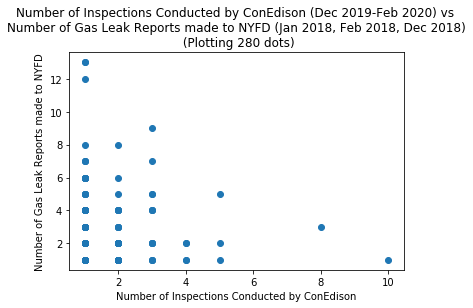

In [4]:
print("------------------------ SHOWING THE SAME SCATTER PLOT ( not interactive ) ------------------------")
# NON INTERACTIVE PLOT:
titleStr =  'Number of Inspections Conducted by ConEdison (Dec 2019-Feb 2020) vs \nNumber of Gas Leak Reports made to NYFD (Jan 2018, Feb 2018, Dec 2018)\n (Plotting '+str(len(vsDF))+" dots)"
plt.scatter(vsDF.NumberOfReports_ConEd.values, vsDF.NumberOfReports_FDNY.values,)
plt.xlabel('Number of Inspections Conducted by ConEdison')
plt.ylabel('Number of Gas Leak Reports made to NYFD')
plt.title(titleStr)
plt.show()  

In [5]:
Springprint("------------------------ SHOWING THE SAME SCATTER PLOT ( interactive ) ------------------------")
# INTERACTIVE PLOT:
titleStr =  'Number of Inspections Conducted by ConEdison vs \nNumber of Gas Leak Reports made to NYFD \n(Plotting '+str(len(vsDF))+" dots)"
fig = px.scatter(vsDF, x="NumberOfReports_ConEd", y="NumberOfReports_FDNY", color="CountyName", hover_data=['MonthYear_ConEd', 'MonthYear_FDNY', 'Geoid', "CensusTract" ])
# print("***TITLE OF SCATTER PLOT:*** \n"+titleStr)
fig.update_layout(title=titleStr)
fig.show() 


NameError: name 'Springprint' is not defined